In [129]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
from pylab import rcParams
figsize = rcParams["figure.figsize"]

In [130]:
df_credit = pd.read_csv("german_credit_data.csv")

In [131]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
CHK_ACCT            1000 non-null int64
DURATION            1000 non-null int64
HISTORY             1000 non-null int64
NEW_CAR             1000 non-null int64
USED_CAR            1000 non-null int64
FURNITURE           1000 non-null int64
RADIO/TV            1000 non-null int64
EDUCATION           1000 non-null int64
RETRAINING          1000 non-null int64
AMOUNT              1000 non-null int64
SAV_ACCT            1000 non-null int64
EMPLOYMENT          1000 non-null int64
INSTALL_RATE        1000 non-null int64
MALE_DIV            1000 non-null int64
MALE_SINGLE         1000 non-null int64
MALE_MAR_or_WID     1000 non-null int64
CO-APPLICANT        1000 non-null int64
GUARANTOR           1000 non-null int64
PRESENT_RESIDENT    1000 non-null int64
REAL_ESTATE         1000 non-null int64
PROP_UNKN_NONE      1000 non-null int64
AGE                 1000 non-null int64
OTHER_INSTALL 

In [132]:
#Looking unique values
df_credit.nunique()

CHK_ACCT              4
DURATION             33
HISTORY               5
NEW_CAR               2
USED_CAR              2
FURNITURE             2
RADIO/TV              2
EDUCATION             2
RETRAINING            2
AMOUNT              921
SAV_ACCT              5
EMPLOYMENT            5
INSTALL_RATE          4
MALE_DIV              2
MALE_SINGLE           2
MALE_MAR_or_WID       2
CO-APPLICANT          2
GUARANTOR             2
PRESENT_RESIDENT      4
REAL_ESTATE           2
PROP_UNKN_NONE        2
AGE                  53
OTHER_INSTALL         2
RENT                  2
OWN_RES               2
NUM_CREDITS           4
JOB                   4
NUM_DEPENDENTS        2
TELEPHONE             2
FOREIGN               2
RESPONSE              2
dtype: int64

In [133]:
#Looking the data
df_credit.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,0


In [134]:
df_credit["RESPONSE"].value_counts()
df_credit["RISK"] = df_credit["RESPONSE"]
df_credit = df_credit.drop(["RESPONSE"], axis=1)
vc = df_credit["RISK"].value_counts()
vc

1    700
0    300
Name: RISK, dtype: int64

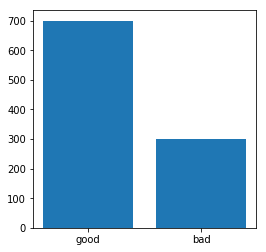

In [135]:
rcParams["figure.figsize"] = 4,4
plt.bar(["good","bad"], vc); plt.show()

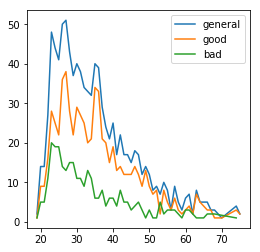

In [136]:
good = df_credit[df_credit["RISK"] == 1].groupby("AGE")["RISK"].count()

# artificial descripancy in AGE
# df_temp = df_credit[df_credit["RISK"] == 0]
# df_temp["AGE"]=(df_temp["AGE"]*0.5) + df_temp["AGE"].mean()

bad = df_credit[df_credit["RISK"] == 0].groupby("AGE")["RISK"].count()

gen = df_credit.groupby("AGE")["RISK"].count()
plt.plot(gen)
plt.plot(good)
plt.plot(bad)
plt.legend(["general","good","bad"])
plt.show()

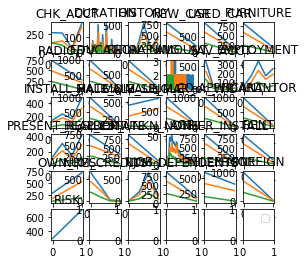

In [89]:
from math import sqrt
target = "RISK"
n = len(df_credit.columns)
rc = int(sqrt(n))
fig, axs = plt.subplots(rc+1,rc+1)
rcParams["figure.figsize"] = 15,15

i=0; j=0
for col in df_credit.columns:
    good = df_credit[df_credit[target] == 1].groupby(col)[target].count().tolist()
    bad = df_credit[df_credit[target] == 0].groupby(col)[target].count().tolist()
    gen = df_credit.groupby(col)[target].count().tolist()
    axs[i,j].plot(gen)
    axs[i,j].plot(good)
    axs[i,j].plot(bad)
    axs[i,j].set_title(col)

    if j == rc: 
        j = 0
        i=i+1
    else:
        j= j+1

plt.legend(["general","good","bad"])
plt.show()

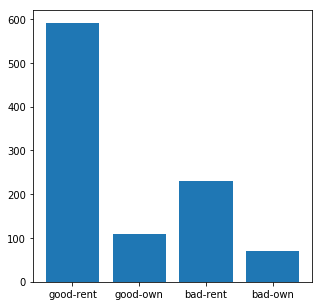

In [137]:
rcParams["figure.figsize"]=5,5
good = df_credit[df_credit[target] == 1].groupby("RENT")[target].count().tolist()
bad = df_credit[df_credit[target] == 0].groupby("RENT")[target].count().tolist()
data = good+bad
plt.bar(["good-rent","good-own","bad-rent","bad-own"], data)
plt.show()

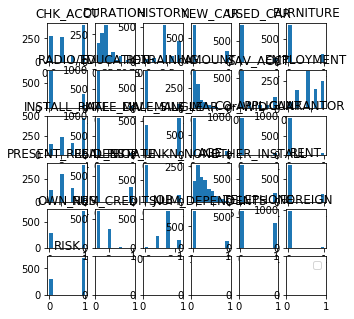

In [91]:
fig, axs = plt.subplots(rc+1,rc+1)
rcParams["figure.figsize"] = 15,15

i=0; j=0
for col in df_credit.columns:
    axs[i,j].hist(df_credit[col])
    axs[i,j].set_title(col)

    if j == rc: 
        j = 0
        i=i+1
    else:
        j= j+1

plt.legend(["general","good","bad"])
plt.show()

In [138]:
df_credit["AMOUNT"].describe()
print(len(set(df_credit["AMOUNT"].tolist())))

921


In [139]:
def roundupx(x, m):
    num = x + (m-1)
    return num - (num % m)

In [140]:
df_credit["AMOUNTX"] = roundupx(df_credit["AMOUNT"],500)
df_credit["AMOUNTX"].describe()
print(len(set(df_credit["AMOUNTX"].tolist())))

31


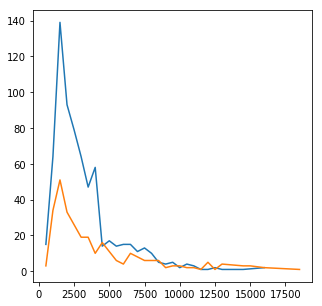

In [141]:
rcParams["figure.figsize"]=5,5
good = df_credit[df_credit[target] == 1].groupby("AMOUNTX")[target].count()
bad = df_credit[df_credit[target] == 0].groupby("AMOUNTX")[target].count()
plt.plot(good)
plt.plot(bad)
plt.show()
df_credit = df_credit.drop(["AMOUNTX"], axis=1)

In [142]:
#categorical columns
cat_col = ["CHK_ACCT","HISTORY","JOB"]; #collect manually
df_credit.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RISK
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,0


In [147]:
# print(df_credit.isna().count())
# df_credit.fillna('no_inf')

df_temp = df_credit
for col in cat_col:
    df_temp = df_temp.merge(pd.get_dummies(df_credit[col], drop_first=True, 
                            prefix=col), left_index=True, right_index=True)
df_temp.head(1)

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,CHK_ACCT_1,CHK_ACCT_2,CHK_ACCT_3,HISTORY_1,HISTORY_2,HISTORY_3,HISTORY_4,JOB_1,JOB_2,JOB_3
0,0,6,4,0,0,0,1,0,0,1169,...,0,0,0,0,0,0,1,0,1,0


In [148]:
for col in cat_col:
    df_temp = df_temp.drop([col], axis=1)
df_temp.head(1)

,DURATION,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,...,CHK_ACCT_1,CHK_ACCT_2,CHK_ACCT_3,HISTORY_1,HISTORY_2,HISTORY_3,HISTORY_4,JOB_1,JOB_2,JOB_3
0,6,0,0,0,1,0,0,1169,4,4,...,0,0,0,0,0,0,1,0,1,0


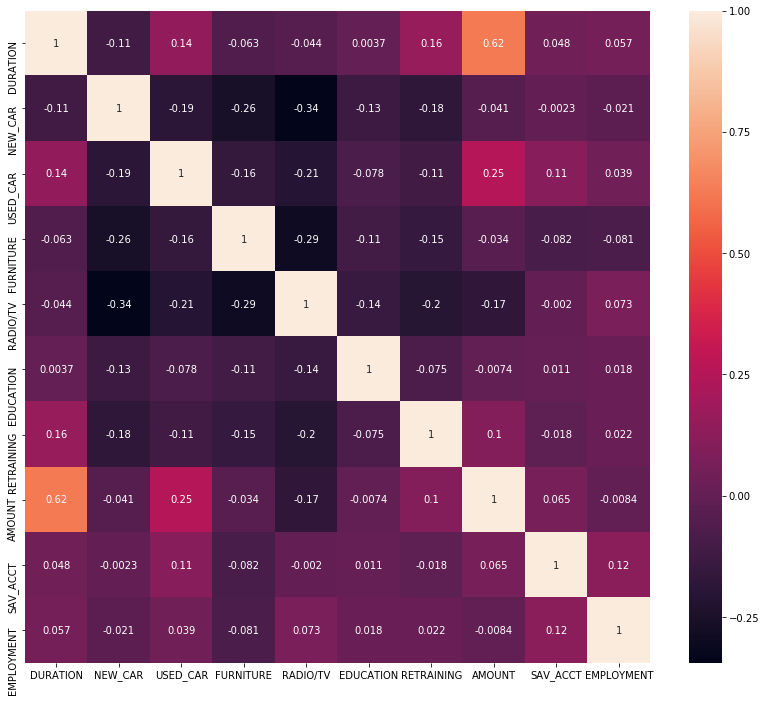

In [175]:
plt.figure(figsize=(14,12))
data = df_temp.iloc[:,0:10]
sns.heatmap(data.astype(float).corr(), annot=True)
plt.show()

# **6. Preprocessing:** <a id="Preprocessing"></a> <br>
- Importing ML librarys
- Setting X and y variables to the prediction
- Splitting Data


In [180]:
df_credit = df_temp
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV # to split the data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score #To evaluate our model

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [181]:
#Creating the X and y variables
X = df_credit.drop(["RISK"], axis=1).values
y = df_credit["RISK"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
print(X_train.shape, X_test.shape)

(750, 37) (250, 37)


In [182]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

In [187]:
import warnings
warnings.filterwarnings("ignore")
# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=5, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = (name, cv_results.mean(), cv_results.std())
        print(msg)
        

('LR', 0.8524698035963297, 0.045429435244349683)
('LDA', 0.8525427181032065, 0.05644864699561683)
('KNN', 0.8375784334052924, 0.039684370826752274)
('CART', 0.7591242128201061, 0.05544798800322142)
('NB', 0.7703924414468254, 0.05968488930638537)
('RF', 0.7916946981985828, 0.05941056293122479)
('SVM', 1.0, 0.0)
('XGB', 0.8698712663585028, 0.03509496039563589)


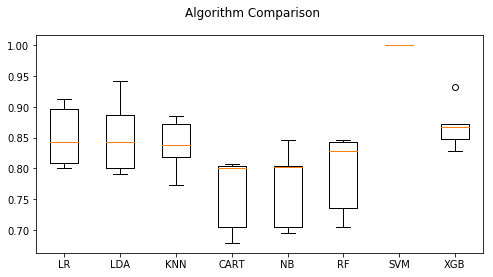

In [188]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(8,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [224]:
#Building Logistic Regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score


In [190]:
#Creating the X and y variables
X = df_credit.drop(["RISK"], axis=1).values
y = df_credit["RISK"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
print(X_train.shape, X_test.shape)


(750, 37) (250, 37)


In [221]:
#training
model = LogisticRegression()
# model = DecisionTreeClassifier()
# model = RandomForestClassifier(n_estimators=100)
# model = SVC(gamma='auto')
# model = XGBClassifier()

model.fit(X_train, y_train)
#predictions
y_pred = model.predict(X_test)


In [222]:
print(accuracy_score(y_test,y_pred))
print("")
print(classification_report(y_test, y_pred))
print("")

0.752

              precision    recall  f1-score   support

           0       0.59      0.47      0.52        72
           1       0.80      0.87      0.83       178

   micro avg       0.75      0.75      0.75       250
   macro avg       0.69      0.67      0.68       250
weighted avg       0.74      0.75      0.74       250




0.8008739076154806


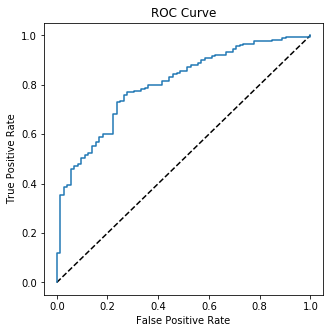

In [220]:
#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred_prob))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [251]:
#RF - Seting the Hyper Parameters
param_grid = {"max_depth": [3,5,7,9,None],
              "n_estimators":[10,30,50,75,100,150],
              "max_features": [5,10,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, 
                           scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] max_depth=3, max_features=5, n_estimators=10 ....................
[CV]  max_depth=3, max_features=5, n_estimators=10, score=0.9904761904761905, total=   0.0s
[CV] max_depth=3, max_features=5, n_estimators=10 ....................
[CV]  max_depth=3, max_features=5, n_estimators=10, score=0.9523809523809523, total=   0.0s
[CV] max_depth=3, max_features=5, n_estimators=10 ....................
[CV]  max_depth=3, max_features=5, n_estimators=10, score=0.9807692307692307, total=   0.0s
[CV] max_depth=3, max_features=5, n_estimators=10 ....................
[CV]  max_depth=3, max_features=5, n_estimators=10, score=1.0, total=   0.0s
[CV] max_depth=3, max_features=5, n_estimators=10 ....................
[CV]  max_depth=3, max_features=5, n_estimators=10, score=0.9903846153846154, total=   0.0s
[CV] max_depth=3, max_features=5, n_estimators=30 ....................
[CV]  max_depth=3, max_features=5, n_estimators=30, score=1.0, tot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=3, max_features=5, n_estimators=30, score=1.0, total=   0.0s
[CV] max_depth=3, max_features=5, n_estimators=50 ....................
[CV]  max_depth=3, max_features=5, n_estimators=50, score=1.0, total=   0.0s
[CV] max_depth=3, max_features=5, n_estimators=50 ....................
[CV]  max_depth=3, max_features=5, n_estimators=50, score=0.9714285714285714, total=   0.0s
[CV] max_depth=3, max_features=5, n_estimators=50 ....................
[CV]  max_depth=3, max_features=5, n_estimators=50, score=0.9807692307692307, total=   0.0s
[CV] max_depth=3, max_features=5, n_estimators=50 ....................
[CV]  max_depth=3, max_features=5, n_estimators=50, score=1.0, total=   0.0s
[CV] max_depth=3, max_features=5, n_estimators=50 ....................
[CV]  max_depth=3, max_features=5, n_estimators=50, score=0.9903846153846154, total=   0.0s
[CV] max_depth=3, max_features=5, n_estimators=75 ....................
[CV]  max_depth=3, max_features=5, n_estimators=75, score=1.0, tota

[CV]  max_depth=3, max_features=15, n_estimators=30, score=0.9238095238095239, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=30 ...................
[CV]  max_depth=3, max_features=15, n_estimators=30, score=0.9615384615384616, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=30 ...................
[CV]  max_depth=3, max_features=15, n_estimators=30, score=0.9903846153846154, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=30 ...................
[CV]  max_depth=3, max_features=15, n_estimators=30, score=0.9807692307692307, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=50 ...................
[CV]  max_depth=3, max_features=15, n_estimators=50, score=0.9809523809523809, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=50 ...................
[CV]  max_depth=3, max_features=15, n_estimators=50, score=0.9047619047619048, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=50 ...................
[CV]  max_depth=

[CV]  max_depth=3, max_features=20, n_estimators=150, score=0.9326923076923077, total=   0.2s
[CV] max_depth=3, max_features=20, n_estimators=150 ..................
[CV]  max_depth=3, max_features=20, n_estimators=150, score=0.9807692307692307, total=   0.2s
[CV] max_depth=3, max_features=20, n_estimators=150 ..................
[CV]  max_depth=3, max_features=20, n_estimators=150, score=0.9807692307692307, total=   0.3s
[CV] max_depth=5, max_features=5, n_estimators=10 ....................
[CV]  max_depth=5, max_features=5, n_estimators=10, score=0.9809523809523809, total=   0.0s
[CV] max_depth=5, max_features=5, n_estimators=10 ....................
[CV]  max_depth=5, max_features=5, n_estimators=10, score=0.8952380952380953, total=   0.0s
[CV] max_depth=5, max_features=5, n_estimators=10 ....................
[CV]  max_depth=5, max_features=5, n_estimators=10, score=0.9326923076923077, total=   0.0s
[CV] max_depth=5, max_features=5, n_estimators=10 ....................
[CV]  max_depth=

[CV]  max_depth=5, max_features=10, n_estimators=75, score=0.9615384615384616, total=   0.0s
[CV] max_depth=5, max_features=10, n_estimators=100 ..................
[CV]  max_depth=5, max_features=10, n_estimators=100, score=0.9809523809523809, total=   0.0s
[CV] max_depth=5, max_features=10, n_estimators=100 ..................
[CV]  max_depth=5, max_features=10, n_estimators=100, score=0.9047619047619048, total=   0.0s
[CV] max_depth=5, max_features=10, n_estimators=100 ..................
[CV]  max_depth=5, max_features=10, n_estimators=100, score=0.9326923076923077, total=   0.0s
[CV] max_depth=5, max_features=10, n_estimators=100 ..................
[CV]  max_depth=5, max_features=10, n_estimators=100, score=0.9423076923076923, total=   0.0s
[CV] max_depth=5, max_features=10, n_estimators=100 ..................
[CV]  max_depth=5, max_features=10, n_estimators=100, score=0.9711538461538461, total=   0.0s
[CV] max_depth=5, max_features=10, n_estimators=150 ..................
[CV]  max_d

[CV]  max_depth=5, max_features=20, n_estimators=50, score=0.8571428571428571, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=50 ...................
[CV]  max_depth=5, max_features=20, n_estimators=50, score=0.875, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=50 ...................
[CV]  max_depth=5, max_features=20, n_estimators=50, score=0.8942307692307693, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=50 ...................
[CV]  max_depth=5, max_features=20, n_estimators=50, score=0.9134615384615384, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=75 ...................
[CV]  max_depth=5, max_features=20, n_estimators=75, score=0.9619047619047619, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=75 ...................
[CV]  max_depth=5, max_features=20, n_estimators=75, score=0.8285714285714286, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=75 ...................
[CV]  max_depth=5, max_featur

[CV]  max_depth=7, max_features=10, n_estimators=10, score=0.9230769230769231, total=   0.0s
[CV] max_depth=7, max_features=10, n_estimators=30 ...................
[CV]  max_depth=7, max_features=10, n_estimators=30, score=0.9809523809523809, total=   0.0s
[CV] max_depth=7, max_features=10, n_estimators=30 ...................
[CV]  max_depth=7, max_features=10, n_estimators=30, score=0.9047619047619048, total=   0.0s
[CV] max_depth=7, max_features=10, n_estimators=30 ...................
[CV]  max_depth=7, max_features=10, n_estimators=30, score=0.8942307692307693, total=   0.0s
[CV] max_depth=7, max_features=10, n_estimators=30 ...................
[CV]  max_depth=7, max_features=10, n_estimators=30, score=0.9134615384615384, total=   0.0s
[CV] max_depth=7, max_features=10, n_estimators=30 ...................
[CV]  max_depth=7, max_features=10, n_estimators=30, score=0.9230769230769231, total=   0.0s
[CV] max_depth=7, max_features=10, n_estimators=50 ...................
[CV]  max_depth=

[CV]  max_depth=7, max_features=15, n_estimators=150, score=0.9619047619047619, total=   0.1s
[CV] max_depth=7, max_features=15, n_estimators=150 ..................
[CV]  max_depth=7, max_features=15, n_estimators=150, score=0.8285714285714286, total=   0.1s
[CV] max_depth=7, max_features=15, n_estimators=150 ..................
[CV]  max_depth=7, max_features=15, n_estimators=150, score=0.8942307692307693, total=   0.1s
[CV] max_depth=7, max_features=15, n_estimators=150 ..................
[CV]  max_depth=7, max_features=15, n_estimators=150, score=0.9038461538461539, total=   0.1s
[CV] max_depth=7, max_features=15, n_estimators=150 ..................
[CV]  max_depth=7, max_features=15, n_estimators=150, score=0.8942307692307693, total=   0.1s
[CV] max_depth=7, max_features=20, n_estimators=10 ...................
[CV]  max_depth=7, max_features=20, n_estimators=10, score=0.9428571428571428, total=   0.0s
[CV] max_depth=7, max_features=20, n_estimators=10 ...................
[CV]  max_d

[CV]  max_depth=9, max_features=5, n_estimators=75, score=0.9423076923076923, total=   0.0s
[CV] max_depth=9, max_features=5, n_estimators=75 ....................
[CV]  max_depth=9, max_features=5, n_estimators=75, score=0.9326923076923077, total=   0.0s
[CV] max_depth=9, max_features=5, n_estimators=75 ....................
[CV]  max_depth=9, max_features=5, n_estimators=75, score=0.9134615384615384, total=   0.0s
[CV] max_depth=9, max_features=5, n_estimators=100 ...................
[CV]  max_depth=9, max_features=5, n_estimators=100, score=0.9619047619047619, total=   0.0s
[CV] max_depth=9, max_features=5, n_estimators=100 ...................
[CV]  max_depth=9, max_features=5, n_estimators=100, score=0.8476190476190476, total=   0.0s
[CV] max_depth=9, max_features=5, n_estimators=100 ...................
[CV]  max_depth=9, max_features=5, n_estimators=100, score=0.9230769230769231, total=   0.0s
[CV] max_depth=9, max_features=5, n_estimators=100 ...................
[CV]  max_depth=9, 

[CV]  max_depth=9, max_features=15, n_estimators=50, score=0.9238095238095239, total=   0.0s
[CV] max_depth=9, max_features=15, n_estimators=50 ...................
[CV]  max_depth=9, max_features=15, n_estimators=50, score=0.8, total=   0.0s
[CV] max_depth=9, max_features=15, n_estimators=50 ...................
[CV]  max_depth=9, max_features=15, n_estimators=50, score=0.8653846153846154, total=   0.0s
[CV] max_depth=9, max_features=15, n_estimators=50 ...................
[CV]  max_depth=9, max_features=15, n_estimators=50, score=0.875, total=   0.1s
[CV] max_depth=9, max_features=15, n_estimators=50 ...................
[CV]  max_depth=9, max_features=15, n_estimators=50, score=0.8846153846153846, total=   0.0s
[CV] max_depth=9, max_features=15, n_estimators=75 ...................
[CV]  max_depth=9, max_features=15, n_estimators=75, score=0.9238095238095239, total=   0.0s
[CV] max_depth=9, max_features=15, n_estimators=75 ...................
[CV]  max_depth=9, max_features=15, n_estima

[CV]  max_depth=None, max_features=5, n_estimators=30, score=0.8942307692307693, total=   0.0s
[CV] max_depth=None, max_features=5, n_estimators=30 .................
[CV]  max_depth=None, max_features=5, n_estimators=30, score=0.8557692307692307, total=   0.0s
[CV] max_depth=None, max_features=5, n_estimators=30 .................
[CV]  max_depth=None, max_features=5, n_estimators=30, score=0.8173076923076923, total=   0.0s
[CV] max_depth=None, max_features=5, n_estimators=50 .................
[CV]  max_depth=None, max_features=5, n_estimators=50, score=0.9428571428571428, total=   0.0s
[CV] max_depth=None, max_features=5, n_estimators=50 .................
[CV]  max_depth=None, max_features=5, n_estimators=50, score=0.8285714285714286, total=   0.0s
[CV] max_depth=None, max_features=5, n_estimators=50 .................
[CV]  max_depth=None, max_features=5, n_estimators=50, score=0.9134615384615384, total=   0.0s
[CV] max_depth=None, max_features=5, n_estimators=50 .................
[CV]

[CV]  max_depth=None, max_features=10, n_estimators=150, score=0.9038461538461539, total=   0.1s
[CV] max_depth=None, max_features=10, n_estimators=150 ...............
[CV]  max_depth=None, max_features=10, n_estimators=150, score=0.8942307692307693, total=   0.1s
[CV] max_depth=None, max_features=10, n_estimators=150 ...............
[CV]  max_depth=None, max_features=10, n_estimators=150, score=0.8846153846153846, total=   0.1s
[CV] max_depth=None, max_features=15, n_estimators=10 ................
[CV]  max_depth=None, max_features=15, n_estimators=10, score=0.8761904761904762, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=10 ................
[CV]  max_depth=None, max_features=15, n_estimators=10, score=0.6666666666666666, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=10 ................
[CV]  max_depth=None, max_features=15, n_estimators=10, score=0.8076923076923077, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=10 ............

[CV]  max_depth=None, max_features=20, n_estimators=75, score=0.8942307692307693, total=   0.0s
[CV] max_depth=None, max_features=20, n_estimators=75 ................
[CV]  max_depth=None, max_features=20, n_estimators=75, score=0.875, total=   0.0s
[CV] max_depth=None, max_features=20, n_estimators=75 ................
[CV]  max_depth=None, max_features=20, n_estimators=75, score=0.8653846153846154, total=   0.1s
[CV] max_depth=None, max_features=20, n_estimators=100 ...............
[CV]  max_depth=None, max_features=20, n_estimators=100, score=0.9619047619047619, total=   0.1s
[CV] max_depth=None, max_features=20, n_estimators=100 ...............
[CV]  max_depth=None, max_features=20, n_estimators=100, score=0.7904761904761904, total=   0.1s
[CV] max_depth=None, max_features=20, n_estimators=100 ...............
[CV]  max_depth=None, max_features=20, n_estimators=100, score=0.8557692307692307, total=   0.1s
[CV] max_depth=None, max_features=20, n_estimators=100 ...............
[CV]  ma

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7, 9, None], 'n_estimators': [10, 30, 50, 75, 100, 150], 'max_features': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=4)

In [252]:
print(grid_search.best_score_)
params = grid_search.best_params_
print(params)

0.9942420024420026
{'max_depth': 3, 'max_features': 5, 'n_estimators': 100}


In [253]:
rf = RandomForestClassifier(max_depth=params['max_depth'], 
                            max_features=params['max_features'], 
                            n_estimators=params['n_estimators'], 
                            random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [254]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test, y_pred))
# print("\n")
# print(fbeta_score(y_test, y_pred, beta=2))

0.712


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.71      1.00      0.83       178

   micro avg       0.71      0.71      0.71       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.51      0.71      0.59       250



In [232]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [233]:
# Criando o classificador logreg
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [234]:
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.748


In [236]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.732


              precision    recall  f1-score   support

           0       0.53      0.61      0.57        72
           1       0.83      0.78      0.81       178

   micro avg       0.73      0.73      0.73       250
   macro avg       0.68      0.70      0.69       250
weighted avg       0.75      0.73      0.74       250



## Let's verify the ROC curve

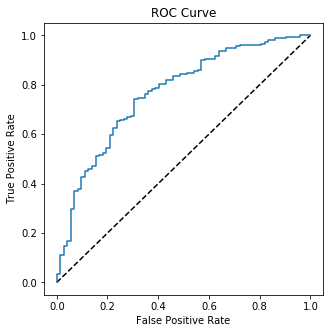

In [237]:
#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# ML pipeline

In [238]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [239]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', GaussianNB()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.7093333333333334


In [241]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test, y_pred))
# print("\n")
# print(fbeta_score(y_test, y_pred, beta=2))

0.704


              precision    recall  f1-score   support

           0       0.48      0.32      0.38        72
           1       0.76      0.86      0.81       178

   micro avg       0.70      0.70      0.70       250
   macro avg       0.62      0.59      0.59       250
weighted avg       0.68      0.70      0.68       250



## Implementing a pipeline of models 

In [242]:
#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=2, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 6, 10], 'min_child_weight': [3, 5, 10], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'subsample': [0.75, 0.8, 0.85], 'colsample_bytree': [0.75, 0.8, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [ ]:
grid_search.best_score_
grid_search.best_params_

In [ ]:
y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

How can I avoid this error? 

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
